In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train_original=train.copy() 
test_original=test.copy()


categoryColumns=train.select_dtypes(include=['object']).columns
numberColumns=train.select_dtypes(include=['int64','float64']).columns


In [3]:
train['Dependents'].value_counts()
test['Dependents'].value_counts()
train['Loan_Status'].value_counts()

train['Dependents'].replace({'3+':3}, inplace=True)
test['Dependents'].replace({'3+':3}, inplace=True)

train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y',1, inplace=True)
# train[categoryColumns].isnull().sum()

In [4]:
train[categoryColumns].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [5]:
train[numberColumns].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [6]:
#####Categorical Columns.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

#Number Columns.
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)


In [7]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [8]:
# train.isnull().sum()
train.columns
train.shape

(614, 13)

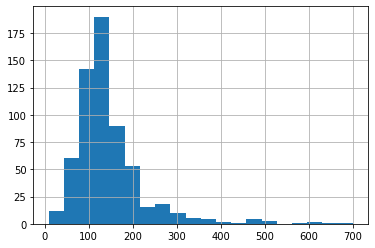

In [9]:
##Graphs.

train['LoanAmount'].hist(bins=20) 

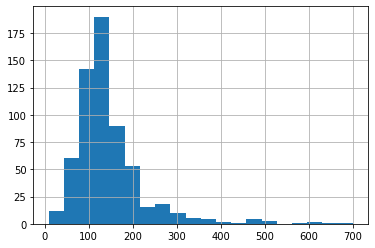

In [10]:
# test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['LoanAmount'].hist(bins=20) 

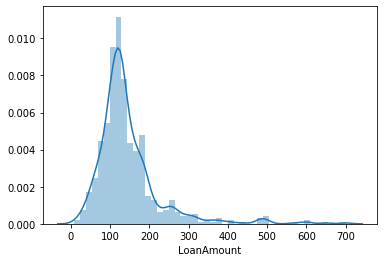

In [11]:
####Data Cleaning Techniques.
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

import seaborn as sns
sns.distplot(train['LoanAmount']) 

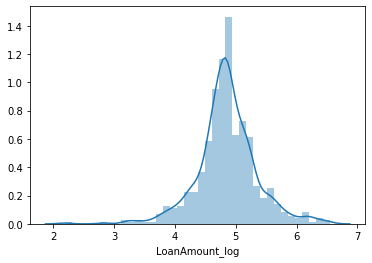

In [12]:
import seaborn as sns
sns.distplot(train['LoanAmount_log'])

In [13]:
train.shape

(614, 14)

In [14]:
test.shape

(367, 13)

In [15]:
test=test.drop(['Loan_ID','LoanAmount'],axis=1)
train=train.drop(['Loan_ID','LoanAmount'],axis=1) 
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log'],
      dtype='object')

In [16]:
train.shape

(614, 12)

In [17]:
test.shape

(367, 11)

In [18]:
features = train.drop('Loan_Status',1) 
target= train.Loan_Status
features.shape

(614, 11)

In [19]:
############Converts Non-Integer features to integer features.
print(features.shape)
features=pd.get_dummies(features) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

(614, 11)


In [20]:
features.shape

(614, 20)

In [21]:
############Splitting the Data into Train and Test Data.
from sklearn.model_selection import train_test_split

trainFeatures, testFeatures, trainTarget, testTarget = train_test_split(features,target, test_size =0.3)


In [22]:
from sklearn.model_selection import StratifiedKFold


In [23]:
kFold = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
# target.shape

In [24]:
##########################Feature Engineering.#############################
######Adding new features that might affect the final result.

#####Adding Total income which is sum of Applicant Income and Coapplicant Income.
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']


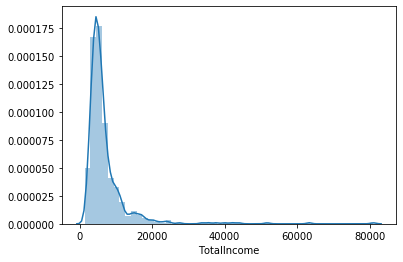

In [25]:
import seaborn as sns;

sns.distplot(train['TotalIncome'])

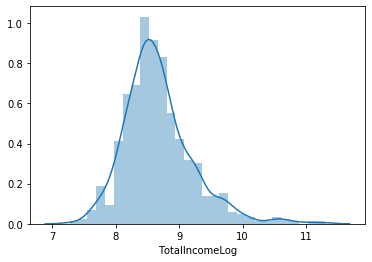

In [26]:
train['TotalIncomeLog']=np.log(train['TotalIncome']);
test['TotalIncomeLog']=np.log(test['TotalIncome']);
sns.distplot(train['TotalIncomeLog'])

In [27]:
#############Setting up EMI column.##########################
# Since, we dropped LoanAmount column, we get it form copy of the train data.
train_original['LoanAmount'].fillna(train_original['LoanAmount'].median(), inplace=True)
test_original['LoanAmount'].fillna(test_original['LoanAmount'].median(), inplace=True)


In [28]:
train['EMI']=train_original['LoanAmount']/train_original['Loan_Amount_Term']
test['EMI']=test_original['LoanAmount']/test_original['Loan_Amount_Term']
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'TotalIncomeLog', 'EMI'],
      dtype='object')

In [29]:
train['EMI'].isnull().sum()

14

In [30]:
test['EMI'].isnull().sum()

6

In [31]:
#############Filling the NULL values in the train and test date sets.##############################
train['EMI'].fillna(train['EMI'].median(), inplace=True)
test['EMI'].fillna(test['EMI'].median(), inplace=True)

In [32]:
#############################Setting up the Balance Income column.###################################
# Multiply EMI column with 1000 to make the units equal 
train['Balance Income']=train['TotalIncome']-(train['EMI']*1000) 
test['Balance Income']=test['TotalIncome']-(test['EMI']*1000)

In [33]:
############Since the newly created features have high correlation with features from which these are created.We remove the 
###################old columns. As, in Regression Analysis, we assume features are independent.

train=train.drop(['ApplicantIncome', 'CoapplicantIncome',  'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome',  'Loan_Amount_Term'], axis=1)

In [34]:
test.shape
###########################################Data Analysis.#################################################

(367, 21)

5416.5


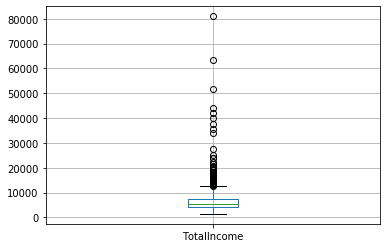

In [35]:
###############################Box Diagram indicating outliers in the TotalIncome.###############################
import seaborn as snb;
print(train['TotalIncome'].median())
boxplot=train.boxplot(column=['TotalIncome'])

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'TotalIncomeLog', 'EMI', 'Balance Income'],
      dtype='object')


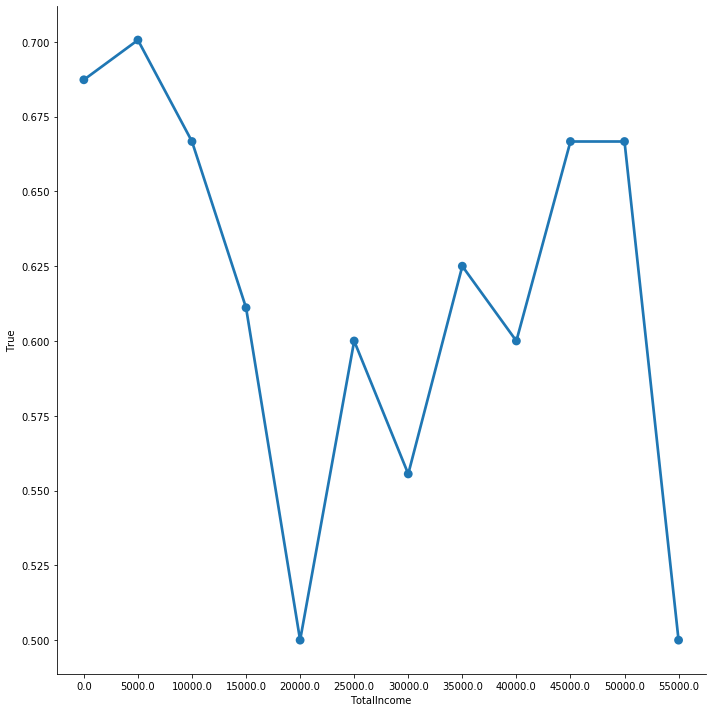

In [36]:
diagFrame=pd.DataFrame(columns=['TotalIncome', 'True', 'False', 'TotalApplicants']);
print(train.columns)
for x in range(0,60000, 5000):
    filt=(train['TotalIncome']>x)
    total=filt.sum();
    
    filt2=((train['TotalIncome']>x) & (train['Loan_Status']==1));
    yes=filt2.sum()
    diagFrame=diagFrame.append({'TotalIncome': x, 'True': float(yes)/total, 'False': total-yes, 'TotalApplicants': total}, ignore_index=True)
diagFrame

import seaborn as sns
sns.factorplot(x='TotalIncome', y='True', size=10, data=diagFrame);

In [37]:
##############Since, we have done data Cleaning and Feature Engineering. We can train and test some models.#################
## Planned Models are: 
## Logistic Regression
## Decision Tree
## Random Forest
## KNN



In [38]:
features2=train.drop('Loan_Status', axis=1)
target2=train['Loan_Status']

In [39]:
features2.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'TotalIncomeLog', 'EMI', 'Balance Income'],
      dtype='object')

In [40]:
#########################Logistic Regression.##################################
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

scores=pd.Series([])
kFold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for trainIndex, testIndex in kFold.split(features2, target2):
    xTrain, xTest=features2.loc[trainIndex], features2.loc[testIndex];
    yTrain, yTest=target2[trainIndex], target2[testIndex]
    model=LogisticRegression(random_state=1)
    model.fit(xTrain,yTrain)
    predTest=model.predict(xTest)
    score=f1_score(yTest, predTest, average='binary')
    print("The confusion matrix is: ")
    print(confusion_matrix(yTest, predTest))
    scores=scores.append(pd.Series(score))
    print("score is: ", score)
    
#     predPracTest=model.predict_proba(test)[:, 1] ## Gives a 2d numpy array, each row has prob. for No, Yes resp.
    predPracTest=model.predict(test)
#     print(type(predPracTest))

print("The mean f1 score obtained over all runs is: ", scores.mean());
print("The max f1 score obtained over all runs is: ", scores.max());
print(classification_report(yTest, predTest))

The confusion matrix is: 
[[16 23]
 [ 1 84]]
score is:  0.875
The confusion matrix is: 
[[19 20]
 [ 4 81]]
score is:  0.8709677419354839
The confusion matrix is: 
[[15 23]
 [ 1 83]]
score is:  0.8736842105263158
The confusion matrix is: 
[[14 24]
 [ 1 83]]
score is:  0.8691099476439791
The confusion matrix is: 
[[18 20]
 [ 0 84]]
score is:  0.8936170212765957
The mean f1 score obtained over all runs is:  0.876475784276475
The max f1 score obtained over all runs is:  0.8936170212765957
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        84

    accuracy                           0.84       122
   macro avg       0.90      0.74      0.77       122
weighted avg       0.87      0.84      0.82       122



In [41]:
predictedFrame=pd.DataFrame()
predictedFrame['LoanStatus']=predPracTest
predictedFrame['Loan_ID']=test_original['Loan_ID']


In [42]:
predictedFrame['LoanStatus'].value_counts()
predictedFrame['LoanStatus'].replace({0:'N', 1:'Y'}, inplace=True)
predictedFrame['LoanStatus'].value_counts()



##########Converts probabilities to Yes/No.############
# filt=predictedFrame['LoanStatus']>=0.5
# predictedFrame.loc[filt,'LoanStatus2']=['Y']
# predictedFrame.loc[~filt,'LoanStatus2']=['N']
# predictedFrame['LoanStatus2']=predictedFrame.apply(lambda row: 'Y' if(row.'LoanStatus'>0.5) else 'N');
# pd.DataFrame(predictedFrame, columns=['Loan_ID', 'LoanStatus', 'LoanStatus2']).to_csv('LogReg.csv')




########Writing the Pandas DataFrame into a csv file.##################
pd.DataFrame(predictedFrame, columns=['Loan_ID', 'LoanStatus']).to_csv('predLogisticReg.csv')

In [43]:
#####################################Decision Tree.#########################################
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix


scores=pd.Series([])

for trainIndex, testIndex in kFold.split(features2, target2):
    xTrain, xTest=features2.loc[trainIndex], features2.loc[testIndex];
    yTrain, yTest=target2[trainIndex], target2[testIndex]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xTrain,yTrain)
    predTest=model.predict(xTest)
    score=f1_score(yTest, predTest, average='binary')
    print("The confusion matrix is: ")
    print(confusion_matrix(yTest, predTest))
    scores=scores.append(pd.Series(score))
    print("score is: ", score)
    
    ###############################Predicting the Loan Status for the test data.###########################
    treePrediction=model.predict(test)
    
print("The mean f1 score obtained over all runs is: ", scores.mean());
print("The max f1 score obtained over all runs is: ", scores.max());
print(classification_report(yTest, predTest))

The confusion matrix is: 
[[26 13]
 [16 69]]
score is:  0.8263473053892215
The confusion matrix is: 
[[25 14]
 [15 70]]
score is:  0.8284023668639053
The confusion matrix is: 
[[20 18]
 [17 67]]
score is:  0.7928994082840236
The confusion matrix is: 
[[21 17]
 [20 64]]
score is:  0.7757575757575756
The confusion matrix is: 
[[21 17]
 [19 65]]
score is:  0.783132530120482
The mean f1 score obtained over all runs is:  0.8013078372830416
The max f1 score obtained over all runs is:  0.8284023668639053
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        38
           1       0.79      0.77      0.78        84

    accuracy                           0.70       122
   macro avg       0.66      0.66      0.66       122
weighted avg       0.71      0.70      0.71       122



In [44]:
treePredictionFrame=pd.DataFrame()
treePredictionFrame['LoanStatus']=treePrediction
treePredictionFrame['Loan_ID']=test_original['Loan_ID']

treePredictionFrame['LoanStatus'].value_counts()
treePredictionFrame['LoanStatus'].replace({1:'Y', 0:'N'}, inplace=True)
# print(treePredictionFrame['LoanStatus'].value_counts())



########Writing the Pandas DataFrame into a csv file.##################
pd.DataFrame(treePredictionFrame, columns=['Loan_ID', 'LoanStatus']).to_csv('predDecisionTree.csv')

In [45]:
##########################################Random Forest.################################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
gridSearch=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)


from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(features2,target2, test_size =0.3, random_state=1)

# Fit the grid search model 
gridSearch.fit(xTrain,yTrain)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [46]:
print((gridSearch.best_estimator_.get_params()))
depth=gridSearch.best_estimator_.get_params()['max_depth']
estimators=gridSearch.best_estimator_.get_params()['n_estimators']

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 141, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

kFold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
scores=pd.Series([])
for trainIndex, testIndex in kFold.split(features2, target2):
    xTrain, xTest=features2.loc[trainIndex], features2.loc[testIndex];
    yTrain, yTest=target2[trainIndex], target2[testIndex]
    model=RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=estimators)
    model.fit(xTrain, yTrain)
    predTest=model.predict(xTest)
    score=f1_score(yTest, predTest, average='binary')
    print("The confusion matrix is: ")
    print(confusion_matrix(yTest, predTest))
    scores=scores.append(pd.Series(score))
    
    forestPrediction=model.predict(test);
    


    
print("The mean f1 score obtained over all runs is: ", scores.mean());
print("The max f1 score obtained over all runs is: ", scores.max());
print(classification_report(yTest, predTest))

The confusion matrix is: 
[[17 22]
 [ 1 84]]
The confusion matrix is: 
[[19 20]
 [ 5 80]]
The confusion matrix is: 
[[15 23]
 [ 2 82]]
The confusion matrix is: 
[[15 23]
 [ 2 82]]
The confusion matrix is: 
[[19 19]
 [ 0 84]]
The mean f1 score obtained over all runs is:  0.8756582948144389
The max f1 score obtained over all runs is:  0.8983957219251336
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.82      1.00      0.90        84

    accuracy                           0.84       122
   macro avg       0.91      0.75      0.78       122
weighted avg       0.87      0.84      0.83       122



In [48]:
treePredictionFrame['LoanStatus']=forestPrediction
treePredictionFrame['LoanStatus'].replace({1:'Y', 0:'N'}, inplace=True)

########Writing the Pandas DataFrame into a csv file.##################
pd.DataFrame(treePredictionFrame, columns=['Loan_ID', 'LoanStatus']).to_csv('predRandomForest.csv')

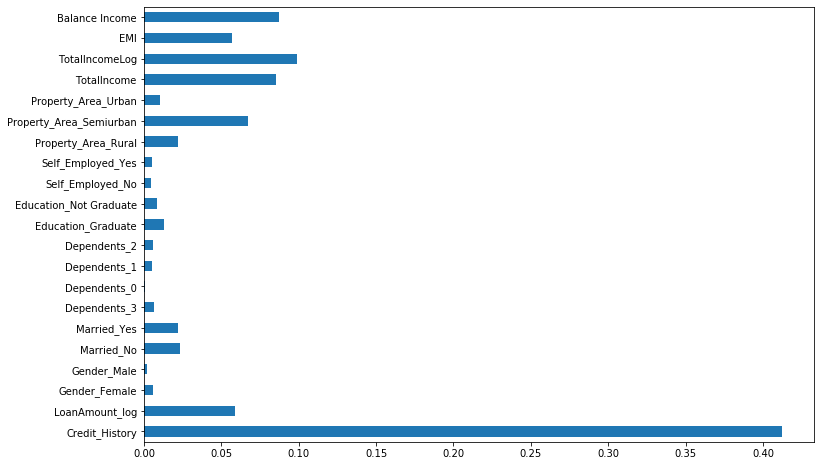

In [49]:
importances=pd.Series(model.feature_importances_, index=features2.columns) 
importances.plot(kind='barh', figsize=(12,8))
######As credit history has highest importance, our feature engineering has helped us in predictions.

In [50]:
################################KNN Classifier#####################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
xTrain, xTest, yTrain, yTest = train_test_split(features2,target2, test_size =0.3, random_state=1)
scores=pd.Series([])

for trainIndex, testIndex in kFold.split(features2, target2):
    xTrain, xTest=features2.loc[trainIndex], features2.loc[testIndex];
    yTrain, yTest=target2[trainIndex], target2[testIndex]
    neigh=KNeighborsClassifier(n_neighbors=5)
    neigh.fit(xTrain, yTrain)
    predTest=neigh.predict(xTest)
    score=f1_score(yTest, predTest, average='binary')
    print("The confusion matrix is: ")
    print(confusion_matrix(yTest, predTest))
    scores=scores.append(pd.Series(score))
    
    knnPrediction=neigh.predict(test);
    
    
print("The mean f1 score obtained over all runs is: ", scores.mean());
print("The max f1 score obtained over all runs is: ", scores.max());
print(classification_report(yTest, predTest))

The confusion matrix is: 
[[ 4 35]
 [10 75]]
The confusion matrix is: 
[[ 6 33]
 [13 72]]
The confusion matrix is: 
[[ 9 29]
 [15 69]]
The confusion matrix is: 
[[ 6 32]
 [15 69]]
The confusion matrix is: 
[[11 27]
 [ 8 76]]
The mean f1 score obtained over all runs is:  0.7688294869719019
The max f1 score obtained over all runs is:  0.8128342245989305
              precision    recall  f1-score   support

           0       0.58      0.29      0.39        38
           1       0.74      0.90      0.81        84

    accuracy                           0.71       122
   macro avg       0.66      0.60      0.60       122
weighted avg       0.69      0.71      0.68       122



In [51]:
treePredictionFrame['LoanStatus']=knnPrediction
treePredictionFrame['LoanStatus'].replace({1:'Y', 0:'N'}, inplace=True)

########Writing the Pandas DataFrame into a csv file.##################
pd.DataFrame(treePredictionFrame, columns=['Loan_ID', 'LoanStatus']).to_csv('predKNNNeigh.csv')